In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')    # reading the csv file
train.head()   

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
train.columns


Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [4]:
train_image = [] 
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Multi_Label_dataset/Images/'+train['Id'][i]+'.jpg',target_size=(128,128,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)
X.shape

100%|██████████████████████████████████████████████████████████████████████████████| 7254/7254 [02:05<00:00, 57.67it/s]


(7254, 128, 128, 3)

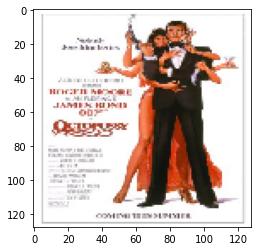

In [5]:
plt.imshow(X[4])

In [6]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 0, test_size=0.1)


In [8]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(128,128,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))


In [9]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 124, 124, 16)      1216      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 62, 62, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 58, 58, 32)        12832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 29, 29, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 29, 29, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 25, 25, 64)       

In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64)

Train on 6528 samples, validate on 726 samples
Epoch 1/15
6528/6528 [==============================] - 63s 10ms/step - loss: 0.3833 - accuracy: 0.8435 - val_loss: 0.2629 - val_accuracy: 0.9068
Epoch 2/15
6528/6528 [==============================] - 26s 4ms/step - loss: 0.2802 - accuracy: 0.9024 - val_loss: 0.2508 - val_accuracy: 0.9051
Epoch 3/15
6528/6528 [==============================] - 26s 4ms/step - loss: 0.2650 - accuracy: 0.9050 - val_loss: 0.2502 - val_accuracy: 0.9053
Epoch 4/15
6528/6528 [==============================] - 26s 4ms/step - loss: 0.2590 - accuracy: 0.9058 - val_loss: 0.2481 - val_accuracy: 0.9066
Epoch 5/15
6528/6528 [==============================] - 26s 4ms/step - loss: 0.2559 - accuracy: 0.9064 - val_loss: 0.2471 - val_accuracy: 0.9069
Epoch 6/15
6528/6528 [==============================] - 26s 4ms/step - loss: 0.2541 - accuracy: 0.9068 - val_loss: 0.2467 - val_accuracy: 0.9063
Epoch 7/15
6528/6528 [==============================] - 26s 4ms/step - loss: 0.252

In [12]:
#prediction 
from keras.preprocessing import image
img = image.load_img('predictions/goodfellas.jpg',target_size=(128,128,3))
img = image.img_to_array(img)
img = img/255


Drama (0.504)
Action (0.285)
Thriller (0.238)


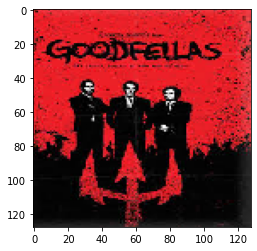

In [13]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,128,128,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [14]:
from keras.preprocessing import image

In [32]:
import os
images = []
classifier_results = []


folder_path = 'predictions'
for img in os.listdir(folder_path):
    img = os.path.join(folder_path, img)
    img = image.load_img(img, target_size=(128, 128))
    img = image.img_to_array(img)
    img = img/255
    img = np.expand_dims(img, axis=0)
    images.append(img)
# stack up images list to pass for prediction
images = np.vstack(images)

classes = np.array(train.columns[2:])
for i in range(1,len(images)):
    prob = model.predict(images[i].reshape(1,128,128,3), batch_size = 1)
    top_3 = np.argsort(prob[0])[:-4:-1]
    for j in range(3):
        fin = ("{}".format(classes[top_3[j]])+ "({:.3})".format(prob[0][top_3[j]]))
        finall.append(fin)  
    classifier_results.append(finall)
    finall=[]

    
#print(plt.imshow(images[i]), classifier_results[i] )


In [34]:
classifier_results

[['Drama',
  'Comedy',
  'Romance',
  'Comedy',
  'Drama',
  'Romance',
  'Drama (0.486)',
  'Romance (0.259)',
  'Drama (0.486)',
  'Romance (0.259)',
  'Drama (0.487)',
  'Romance (0.247)',
  'Comedy (0.268)',
  'Action (0.243)',
  'Action (0.289)',
  'Thriller (0.245)',
  'Action (0.266)',
  'Comedy (0.26)',
  'Comedy (0.278)',
  'Action (0.259)',
  'Drama (0.486)',
  'Romance (0.245)',
  'Drama (0.487)',
  'Romance (0.244)',
  'Action (0.285)',
  'Thriller (0.238)',
  'Action (0.289)',
  'Thriller (0.245)',
  'Action (0.289)',
  'Thriller (0.245)',
  'Action (0.285)',
  'Thriller (0.24)',
  'Comedy (0.364)',
  'Action (0.216)',
  'Drama (0.486)',
  'Romance (0.259)',
  'Drama (0.486)',
  'Romance (0.259)',
  'Action (0.261)',
  'Comedy (0.234)',
  'Action (0.275)',
  'Comedy (0.222)',
  'Drama (0.487)',
  'Romance (0.244)',
  'Drama (0.486)',
  'Romance (0.253)',
  'Comedy (0.359)',
  'Action (0.198)',
  'Comedy (0.336)',
  'Action (0.218)',
  'Drama (0.486)',
  'Romance (0.253)',


In [17]:
len(images)

24